# Convolutional Neural Network with TensorFlow/Keras
## Classifying Articles of Clothing

Convolutional neural network example: classifying "Fashion MNIST": a dataset of 70,000 images from 10 clothing categories:
- t-shirts
- trousers
- pullovers
- dresses
- coats
- sandals
- shirts
- sneakers
- bags
- ankle boots

![fashion mnist](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png "Fashion MNIST")

https://github.com/zalandoresearch/fashion-mnist


### 1. Loading libraries

In [7]:
tf.__version__

'1.8.0'

In [9]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import time

Using TensorFlow backend.


### 2. Downloading the data

In [10]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


### 3. Checking the data

In [11]:
# Training set shape - 60,000 training data of image size of 28x28 and 60,000 train labels
print ('x_train: Train Data - ' + str(x_train.shape) + " - " + str(type(x_train)))
print ('y_train: Train Labels - ' + str(y_train.shape) + " - " + str(type(y_train)))

x_train: Train Data - (60000, 28, 28) - <class 'numpy.ndarray'>
y_train: Train Labels - (60000,) - <class 'numpy.ndarray'>


In [12]:
# Testing set shape - 10,000 training data of image size of 28x28 and 10,000 train labels
print ('x_test: Test Data - ' + str(x_test.shape) + " - " + str(type(x_test)))
print ('y_test: Test Labels - ' + str(y_test.shape) + " - " + str(type(y_test)))

x_test: Test Data - (10000, 28, 28) - <class 'numpy.ndarray'>
y_test: Test Labels - (10000,) - <class 'numpy.ndarray'>


### 4. Defining text labels

In [13]:
# List of text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

### 5. Visualizing the data

Image index: 600
Label index: 0
Label text: T-shirt/top


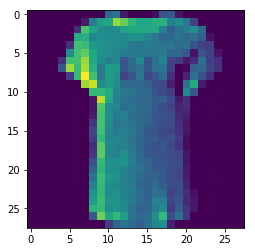

In [14]:
#Selecting a random image in our dataset by picking a number between 0 and 59,000 for image index
img_index = 600

# Getting the label for that image from "y_train" data set that contains labels, ranging from 0 to 9
label_index = y_train[img_index]

# Printing the label of the image
print ("Image index: " + str(img_index))
print ("Label index: " + str(label_index))
print ("Label text: " + (fashion_mnist_labels[label_index]))

# Showing the image itself from the training dataset
plt.imshow(x_train[img_index]);

### 6. Changing data type

In [15]:
# Original data type
print ("x_train - type: " + str(x_train.dtype))
print ("x_test - type: " + str(x_train.dtype))

x_train - type: uint8
x_test - type: uint8


In [16]:
# Converting data types to float and normalizing the data dimensions so that they are of approximately the same scale
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
# New data type
print ("x_train - type: " + str(x_train.dtype))
print ("x_test - type: " + str(x_train.dtype))

x_train - type: float32
x_test - type: float32


### 7. Splitting the data into Train / Validation / Test data sets

*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [18]:
# Breaking training data into train / validation sets. validation set = 5000, training set = 55000
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

### 8. Reshaping the data

In [19]:
# Reshape input data from (28, 28) to (28, 28, 1). 
# Each input example is a 28x28 image set, each having 1 channel. 1 - Grayscale, 3 - RGB, etc. 
# That’s why the input_shape argument to the first Conv2D layer is (28, 28, 1), corresponding to height, width and number of channels respectively.
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

### 9. One-hot encoding the labels

Example:

Total label categories - 10

* Label text - Ankle boot
* Label index - 9
* Label index after one-hot encoding - [0,0,0,0,0,0,0,0,1,0]

In [20]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### 10. Displaying prepared data sets

In [21]:
# Printing data sets shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_train shape:", x_valid.shape, "y_train shape:", y_valid.shape)
print("x_train shape:", x_test.shape, "y_train shape:", y_test.shape)
print ()

# Printing the number of training, validation, and test datasets
print('Training set - ' + str(x_train.shape[0]))
print('Validation set - ' + str(x_valid.shape[0]))
print('Testing set - ' + str(x_test.shape[0]))

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
x_train shape: (5000, 28, 28, 1) y_train shape: (5000, 10)
x_train shape: (10000, 28, 28, 1) y_train shape: (10000, 10)

Training set - 55000
Validation set - 5000
Testing set - 10000


### 11. Creating the model

To define a model we are using Keras Sequential model. Keras models are trained on Numpy arrays of input data and labels.

In [22]:
#Selecting the model
model = tf.keras.Sequential()

# Defining the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Checking the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

### 12. Compilation

Configuring the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### 13. Training the model

We will use the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.

In [24]:
# Hyperparameters
epochs = 20
batch_size = 64

In [25]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = time.time()
training = model.fit(x_train,
         y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

training_time = time.time() - start_time

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 104s 2ms/step - loss: 0.6059 - acc: 0.7786 - val_loss: 0.3733 - val_acc: 0.8650

Epoch 00001: val_loss improved from inf to 0.37329, saving model to model.weights.best.hdf5
Epoch 2/20
55000/55000 [==============================] - 109s 2ms/step - loss: 0.4182 - acc: 0.8473 - val_loss: 0.3337 - val_acc: 0.8776

Epoch 00002: val_loss improved from 0.37329 to 0.33372, saving model to model.weights.best.hdf5
Epoch 3/20
55000/55000 [==============================] - 114s 2ms/step - loss: 0.3722 - acc: 0.8637 - val_loss: 0.2983 - val_acc: 0.8934

Epoch 00003: val_loss improved from 0.33372 to 0.29828, saving model to model.weights.best.hdf5
Epoch 4/20
55000/55000 [==============================] - 169s 3ms/step - loss: 0.3458 - acc: 0.8725 - val_loss: 0.2799 - val_acc: 0.8982

Epoch 00004: val_loss improved from 0.29828 to 0.27987, saving model to model.weights.best.hdf5
Epoch 5/20
5500

Training 20 epochs in 73:15.9


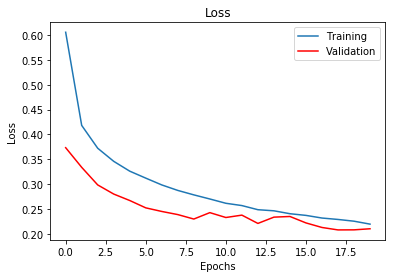

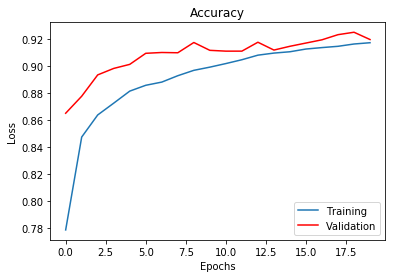

In [26]:
mm = training_time // 60
ss = training_time % 60
print('Training {} epochs in {}:{}'.format(epochs, int(mm), round(ss, 1)))

# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

### 14. Load Model with the best validation accuracy

In [27]:
# Loading the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 15. Testing the accuracy

In [28]:
# Evaluating the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Printing test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9193


### 16. Visualizing the prediction

Visualizing the prediction using our model. First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and match the titles with the prediction. If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

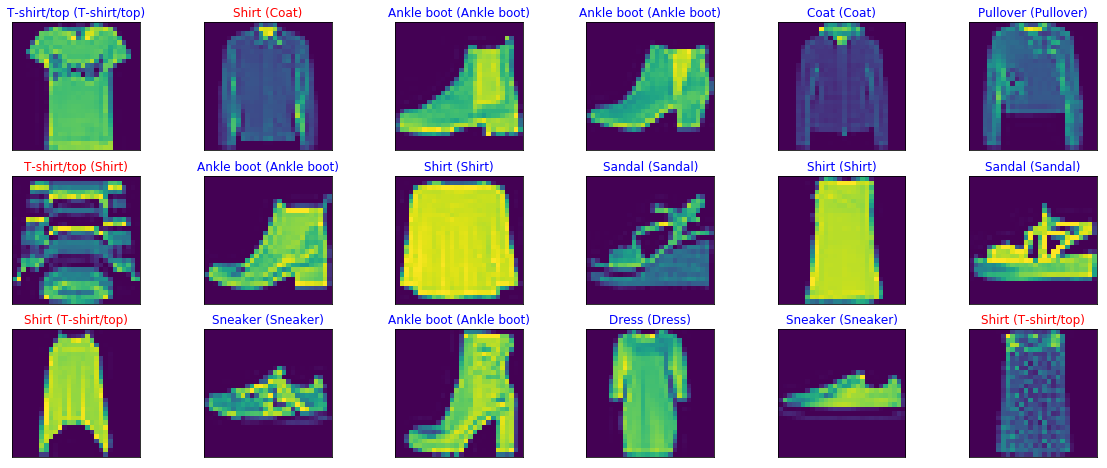

In [29]:
y_hat = model.predict(x_test)

# Plot a random sample of 18 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=18, replace=False)):
    ax = figure.add_subplot(3, 6, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("blue" if predict_index == true_index else "red"))